In [4]:
import matplotlib.pyplot as plt
import numpy as np

[[11 10  8  9  7  5  2  6  4  1  3  0]
 [11 10  9  5  1  2  8  4  7  0  6  3]]


IndexError: index 11 is out of bounds for axis 0 with size 2

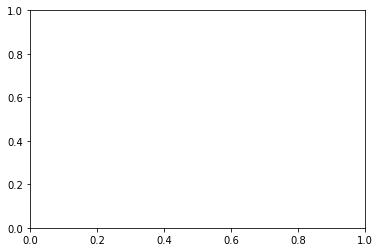

In [269]:
fig, ax = plt.subplots()
lasso = np.array([0.8750, 0.8125, 0.4219, 0.8438,\
                  0.5000, 0.2891, 0.4688, 0.2617, 0.1406,0.2441, 0.0273, 0.0098])
# ours = np.array([0.5,0.406,0.406,0.6485,0.46875,0.3828,\
#                  0.6328,0.4765,0.4257,0.3183,0.1054,0.0781])

x = np.vstack([lasso, ours])
ind = np.argsort(x,axis=1)
print(ind)
# x = (x.reshape([2,-1]))
# x = (x / np.linalg.norm(x)).reshape([2,-1])

# im = ax.imshow(x)
# ours 0.125

# for i in range(1):
#     for j in range(lasso.shape[0]):
#         text = ax.text(j,i,int(x[j,i]*100)/100,ha="center",va="center",color="white")


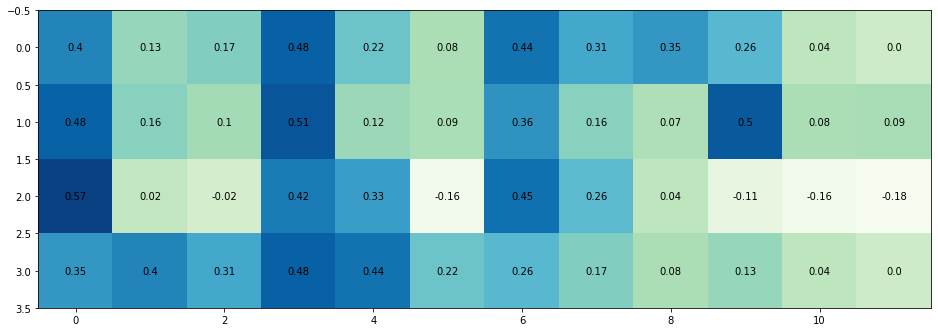

In [333]:
fig, ax = plt.subplots(figsize=[16,9])
# T_grads 1st 100 iter's Mean ; 
# DIR: /home/zhaotianchen/code/pt_adv/logs/res18/plan1/pretrain/budget_0.125'
grads = np.array([-0.21046494, -0.07042833, -0.04646142, -0.22305243, -0.05327817,
-0.03906904, -0.15812522, -0.07029 , -0.03422718, -0.21947866,
-0.03751051, -0.04256288])
grads = (grads / np.linalg.norm(grads))
grads = (-1)*grads


# DIR: /home/zhaotianchen/code/pt_adv/logs/res18/lasso/lambda/lambda_5e-03
# lasso = [0.8750, 0.8125, 0.4219, 0.8438,\
#                   0.5000, 0.2891, 0.4688, 0.2617, 0.1406,0.2441, 0.0273, 0.0098]

# DIR /home/zhaotianchen/code/pt_adv/logs/res18/lasso/lambda/lambda_1e-02
# 10.2% FLOPs
lasso = [0.3438, 0.3750, 0.2812, 0.9375, 0.3750, 0.2109, 0.2773, 0.1328, 
         0.1133,0.1172, 0.0488, 0.0078]

# Ours
x = [0.357, 0.273, 0.278, 0.543, 0.289, 0.267, 0.503, 0.319, 0.319, 0.308, 0.159, 0.151]
x_ = x
x0 = 10*np.log2(x)

# Sensitivity
sens = [55.820,   
1.220, 
0.810,    
20.410,   
10.900,   
0.310,    
24.050,   
6.260,    
1.350,    
0.430,    
0.320,    
0.270]    

ind = np.argsort(x)
for i,j in enumerate(ind):
    x[j] = i
    

ind = np.argsort(lasso)
for i,j in enumerate(ind):
    lasso[j] = i

# plt.plot(x, label="rank")

x = np.array(x).reshape([1,-1])
x = (x / np.linalg.norm(x))
lasso = np.array(lasso).reshape([1,-1])
lasso = (lasso / np.linalg.norm(lasso))
sens = np.log2(sens)
sens = (sens / np.linalg.norm(sens))
x0 = np.vstack([x,grads,sens,lasso])
im = ax.imshow(x0, cmap="GnBu")

for i in range(12):
    for j in range(4):
        text = ax.text(i,j,int(x0[j,i]*100)/100,ha="center",va="center",color="black")
        

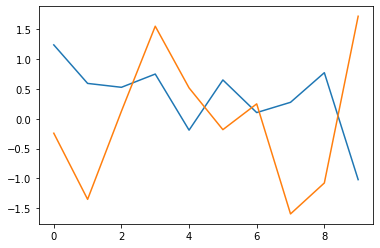

In [15]:
x = np.random.randn(10,2)
plt.figure()
plt.plot(x)
plt.show()

In [215]:
x = np.ones(3)
print(x)
np.vstack([x,x])

[1. 1. 1.]


array([[1., 1., 1.],
       [1., 1., 1.]])

[1. 2. 3. 4. 5.] [-5. -4. -3. -2. -1.]


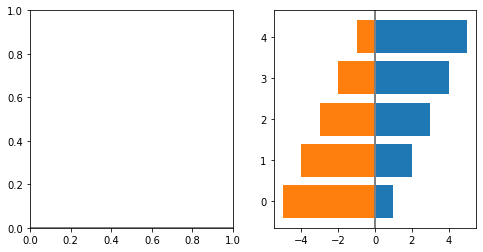

In [37]:

x = np.arange(5)
y1 = np.array([1.,2.,3.,4.,5.])
y2 = np.array([-5.,-4.,-3.,-2.,-1.])
fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

print(y1,y2)
# vert_bars = axes[0].bar(x, y, color='lightblue', align='center')
horiz_bars = axes[1].barh(x, y1, align='center')
horiz_bars = axes[1].barh(x, y2, align='center')

# I'll also introduce axhline & axvline to draw a line all the way across the axes
# This can be a quick-n-easy way to draw an axis "spine".
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

plt.show()

In [365]:
# ResNet18 Results
d = {}
d["Ours"] = [[ 94.2, 93.6, 93.0,91.9,91.4],[0.5,0.25,0.125,0.0625,0.0375]]
d["Morph"] = [[93.5,91.83,87.05],[0.62,0.08182,0.0329]]
d["Lasso"] = [[92.47,90.4,86.2],[0.5,0.25,0.11]]
d["TAS"] = [[92.88],[0.45]]
d["FPGM"] = [[91.09],[0.4]]
d["SFP"] = [[91.9,90.83],[0.5,0.4]]

# ResNet50
d = {}
d["Ours"] = [[93.8,93.73,93.4,92.28],[0.25,0.125,0.0625,0.0375]]
d["Morph"] = [[93.49],[0.621]]
d["Lasso"] = [[92.4],[0.513]]
d["TAS"] = [[93.69],[0.527]]
d["FPGM"] = [[93.49],[0.526]]
d["SFP"] = [[93.36],[0.526]]
d["AMC"] = [[91.9],[0.5]]
d["LCCL"] = [[92.81],[0.379]]
d["Variational"] = [[91.66],[0.8]]
d["Channel Pruning"] = [[91.8],[0.5]]
d["LeGR"] = [[93.4,93.6,93.79],[0.5,0.6,0.7]]


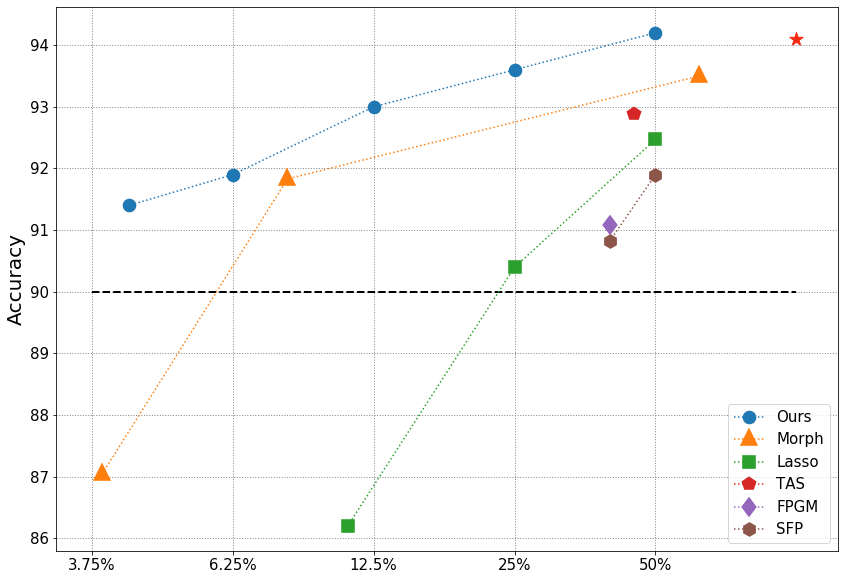

In [401]:
# ResNet18 Results
d = {}
d["Ours"] = [[ 94.2, 93.6, 93.0,91.9,91.4],[0.5,0.25,0.125,0.0625,0.0375]]
d["Morph"] = [[93.5,91.83,87.05],[0.62,0.08182,0.0329]]
d["Lasso"] = [[92.47,90.4,86.2],[0.5,0.25,0.11]]
d["TAS"] = [[92.88],[0.45]]
d["FPGM"] = [[91.09],[0.4]]
d["SFP"] = [[91.9,90.83],[0.5,0.4]]

fig, ax = plt.subplots(figsize=[14,10])
# fig.suptitle("Scatter Example",c="white")
# plt.title("Scatter Example", c="white")
# ax.set_title("ResNet50", c="white",fontsize=24)
# fig.tight_layout()
ax.grid(b=True, linestyle=':', linewidth='1', color='#858585')
# plt.xlabel("FLOPs",c="black",fontsize=20)
plt.ylabel("Accuracy",c="black",fontsize=20)
# plt.xlim([0,5])
plt.xticks(np.arange(-5,0),("3.75%","6.25%","12.5%","25%","50%"),fontsize=15)
plt.yticks(fontsize=15)


markers = ["o","^","s","p","d","h","H","8","+","x","v"]
for idx, name in enumerate(d.keys()):
    # ax.scatter(np.log2(d[name][1]),d[name][0],s=100,marker=markers[idx])
    ax.plot(np.log2(d[name][1]),d[name][0],linestyle=":",label=name,
            mew=7.6,marker=markers[idx])
ax.scatter(0,94.1,marker="*",s=200,alpha=1,color="#f42b14")
ax.legend(fontsize=15,loc="lower right")
# ax.scatter(x,y,color="#3e74c7",marker="s")
# ax.scatter(y,x,color="#9fb9e3",marker="p")
plt.hlines(90,-5,0,lw = 2,linestyle="--")
plt.savefig("res18.png")



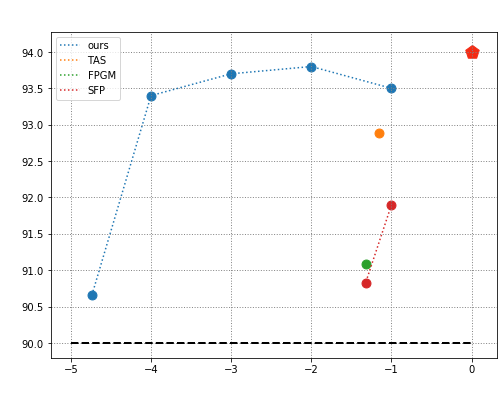